In [92]:
import pandas as pd
import matplotlib
import seaborn as sns
import pickle

In [93]:
data=pd.read_csv(r'C:\Users\sauda\OneDrive\Desktop\house price prediction\data.csv')

In [94]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [95]:
data.shape

(4600, 18)

In [96]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [97]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

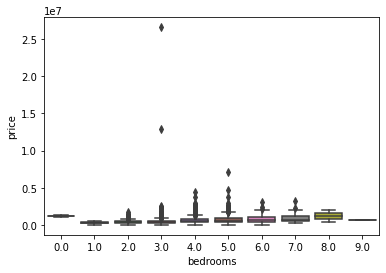

In [98]:
sns.boxplot(x='bedrooms',y='price',data=data)

# Splitting of Data for training and testing

In [99]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [100]:
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors','condition',]]

In [101]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,3.0,1.50,1340,7912,1.5,3
1,5.0,2.50,3650,9050,2.0,5
2,3.0,2.00,1930,11947,1.0,4
3,3.0,2.25,2000,8030,1.0,4
4,4.0,2.50,1940,10500,1.0,4
...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,4
4596,3.0,2.50,1460,7573,2.0,3
4597,3.0,2.50,3010,7014,2.0,3
4598,4.0,2.00,2090,6630,1.0,3


In [102]:
Y = data['price']

In [103]:
Y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [104]:
from sklearn.model_selection import train_test_split  

In [105]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

# Scaling Data

In [106]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [107]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# Model Training

In [108]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [109]:
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [110]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(Y_test,Y_pred)

181000.57199538805

In [111]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
4032,4.0,3.00,5430,108900,2.0,4
1558,3.0,2.25,2270,8876,1.0,3
2004,4.0,2.50,2070,4500,2.0,3
3186,2.0,2.25,2550,6000,2.0,5
4176,3.0,1.50,1460,9908,1.0,3
...,...,...,...,...,...,...
3323,3.0,2.75,1850,16960,1.0,4
3067,3.0,2.50,1500,1375,2.0,3
556,5.0,3.00,2450,4591,2.0,3
586,2.0,0.75,650,5360,1.0,4


In [112]:
X_test.loc[1558]

bedrooms          3.00
bathrooms         2.25
sqft_living    2270.00
sqft_lot       8876.00
floors            1.00
condition         3.00
Name: 1558, dtype: float64

In [113]:
r2_score(Y_test,Y_pred)

0.27013614957338583

# Prediction

In [114]:
new_house=[[3,2,2270,8876,1,3]]

In [115]:
int(lr.predict(new_house))

c:\Users\sauda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


571187

In [116]:

pickle.dump(lr,open('model.pkl','wb'))